Shuan Mahmoodi

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import pylab
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas import *
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [189]:
df = pd.read_csv('chr2015.csv', thousands = ',')
#A list for holding the coefficients of each predictors
S_C=[]

In [190]:
response = df.Premature_death_Value

pred1 = df.copy().Diabetes_Value
pred2 = df.copy().Median_household_income_Value
pred3 = df.copy().Children_eligible_for_free_lunch_Value.fillna(df.Children_eligible_for_free_lunch_Value.mean()) # 91% of the data is valid 
pred4 = df.copy().HIV_prevalence_rate_Value.fillna(df.HIV_prevalence_rate_Value.mean())
pred5 = df.copy().Driving_alone_to_work_Value
pred6 = df.copy().Severe_housing_problems_Value

df['Children_eligible_for_free_lunch_Value'] = df.copy().Children_eligible_for_free_lunch_Value.fillna(df.Children_eligible_for_free_lunch_Value.mean())
df['HIV_prevalence_rate_Value'] = pred4 = df.copy().HIV_prevalence_rate_Value.fillna(df.HIV_prevalence_rate_Value.mean())

pred1 = sm.add_constant(pred1)
pred2 = sm.add_constant(pred2)
pred3 = sm.add_constant(pred3)
pred4 = sm.add_constant(pred4)
pred5 = sm.add_constant(pred5)
pred6 = sm.add_constant(pred6)

In [191]:
est_1 = sm.OLS(response,pred1)
est_1 = est_1.fit()
est_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Premature_death_Value   R-squared:                       0.422
Model:                               OLS   Adj. R-squared:                  0.422
Method:                    Least Squares   F-statistic:                     2226.
Date:                   Mon, 28 Sep 2015   Prob (F-statistic):               0.00
Time:                           21:59:10   Log-Likelihood:                -27225.
No. Observations:                   3048   AIC:                         5.445e+04
Df Residuals:                       3046   BIC:                         5.447e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            592.0935    160.095      3.698      0.000       278.189   905.998
Diabetes_Value   6.72e+04   1424.346     47.177      0.000      6.44e+04     7e+04
==============================================================================
Omnibus:                     1103.881   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7179.160
Skew:                           1.568   Prob(JB):                         0.00
Kurtosis:                       9.833   Cond. No.                         43.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

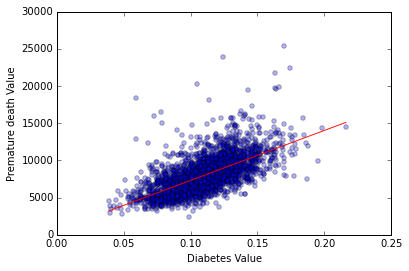

In [192]:
X_prime = np.linspace(pred1.Diabetes_Value.min(), pred1.Diabetes_Value.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before
# Now we calculate the predicted values
y_hat = est_1.predict(X_prime)
plt.scatter(pred1.Diabetes_Value, response, alpha=0.3)  # Plot the raw data
plt.xlabel("Diabetes Value")
plt.ylabel("Premature death Value")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red



In [193]:
S_C.append(est_1.params.Diabetes_Value)

In [194]:
est_2 = sm.OLS(response,pred2)
est_2 = est_2.fit()
est_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Premature_death_Value   R-squared:                       0.399
Model:                               OLS   Adj. R-squared:                  0.398
Method:                    Least Squares   F-statistic:                     2020.
Date:                   Mon, 28 Sep 2015   Prob (F-statistic):               0.00
Time:                           21:59:11   Log-Likelihood:                -27285.
No. Observations:                   3048   AIC:                         5.457e+04
Df Residuals:                       3046   BIC:                         5.459e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
const                          1.395e+04    137.074    101.770      0.000      1.37e+04  1.42e+04
Median_household_income_Value    -0.1296      0.003    -44.940      0.000        -0.135    -0.124
==============================================================================
Omnibus:                      886.794   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4805.329
Skew:                           1.275   Prob(JB):                         0.00
Kurtosis:                       8.598   Cond. No.                     1.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

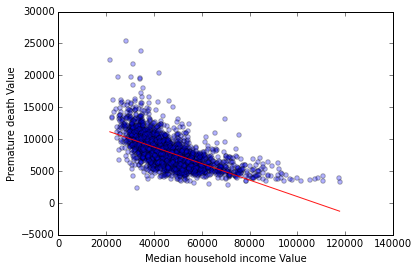

In [195]:
X_prime = np.linspace(pred2.Median_household_income_Value.min(), pred2.Median_household_income_Value.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before
# Now we calculate the predicted values
y_hat = est_2.predict(X_prime)
plt.scatter(pred2.Median_household_income_Value, response, alpha=0.3)  # Plot the raw data
plt.xlabel("Median household income Value")
plt.ylabel("Premature death Value")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red

In [196]:
S_C.append(est_2.params.Median_household_income_Value)

In [197]:
est_3 = sm.OLS(response,pred3)
est_3 = est_3.fit()
est_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Premature_death_Value   R-squared:                       0.363
Model:                               OLS   Adj. R-squared:                  0.363
Method:                    Least Squares   F-statistic:                     1736.
Date:                   Mon, 28 Sep 2015   Prob (F-statistic):          1.09e-300
Time:                           21:59:11   Log-Likelihood:                -27373.
No. Observations:                   3048   AIC:                         5.475e+04
Df Residuals:                       3046   BIC:                         5.476e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
const                                   4048.2570    100.609     40.238      0.000      3850.989  4245.525
Children_eligible_for_free_lunch_Value  8979.6539    215.510     41.667      0.000      8557.094  9402.213
==============================================================================
Omnibus:                      761.370   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3607.322
Skew:                           1.119   Prob(JB):                         0.00
Kurtosis:                       7.837   Cond. No.                         7.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

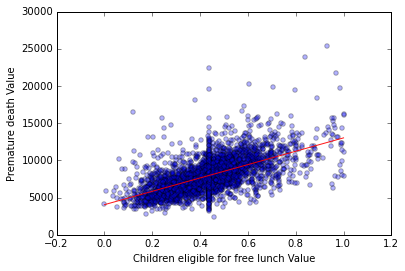

In [198]:
X_prime = np.linspace(pred3.Children_eligible_for_free_lunch_Value.min(), pred3.Children_eligible_for_free_lunch_Value.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before
# Now we calculate the predicted values
y_hat = est_3.predict(X_prime)
plt.scatter(pred3.Children_eligible_for_free_lunch_Value, response, alpha=0.3)  # Plot the raw data
plt.xlabel("Children eligible for free lunch Value")
plt.ylabel("Premature death Value")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red

In [199]:
S_C.append(est_3.params.Children_eligible_for_free_lunch_Value)

In [200]:
est_4 = sm.OLS(response,pred4)
est_4 = est_4.fit()
est_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Premature_death_Value   R-squared:                       0.006
Model:                               OLS   Adj. R-squared:                  0.005
Method:                    Least Squares   F-statistic:                     17.85
Date:                   Mon, 28 Sep 2015   Prob (F-statistic):           2.46e-05
Time:                           21:59:12   Log-Likelihood:                -28052.
No. Observations:                   3048   AIC:                         5.611e+04
Df Residuals:                       3046   BIC:                         5.612e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
const                      7819.9532     57.840    135.200      0.000      7706.544  7933.362
HIV_prevalence_rate_Value     0.9139      0.216      4.225      0.000         0.490     1.338
==============================================================================
Omnibus:                      665.172   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2005.432
Skew:                           1.114   Prob(JB):                         0.00
Kurtosis:                       6.291   Cond. No.                         355.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

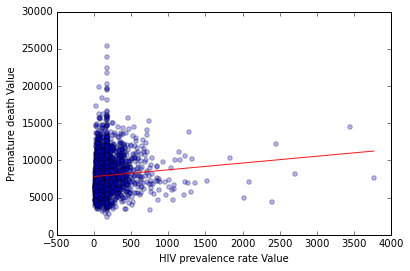

In [201]:
X_prime = np.linspace(pred4.HIV_prevalence_rate_Value.min(), pred4.HIV_prevalence_rate_Value.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before
# Now we calculate the predicted values
y_hat = est_4.predict(X_prime)
plt.scatter(pred4.HIV_prevalence_rate_Value, response, alpha=0.3)  # Plot the raw data
plt.xlabel("HIV prevalence rate Value")
plt.ylabel("Premature death Value")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red

In [202]:
S_C.append(est_4.params.HIV_prevalence_rate_Value)

In [203]:
est_5 = sm.OLS(response,pred5)
est_5 = est_5.fit()
est_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Premature_death_Value   R-squared:                       0.014
Model:                               OLS   Adj. R-squared:                  0.013
Method:                    Least Squares   F-statistic:                     41.86
Date:                   Mon, 28 Sep 2015   Prob (F-statistic):           1.14e-10
Time:                           21:59:13   Log-Likelihood:                -28040.
No. Observations:                   3048   AIC:                         5.608e+04
Df Residuals:                       3046   BIC:                         5.610e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const                        4768.7435    498.372      9.569      0.000      3791.565  5745.922
Driving_alone_to_work_Value  4056.8579    627.054      6.470      0.000      2827.366  5286.350
==============================================================================
Omnibus:                      817.124   Durbin-Watson:                   1.412
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3060.429
Skew:                           1.287   Prob(JB):                         0.00
Kurtosis:                       7.180   Cond. No.                         23.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

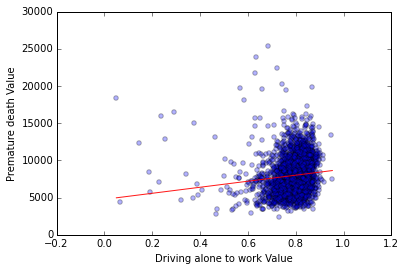

In [204]:
X_prime = np.linspace(pred5.Driving_alone_to_work_Value.min(), pred5.Driving_alone_to_work_Value.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before
# Now we calculate the predicted values
y_hat = est_5.predict(X_prime)
plt.scatter(pred5.Driving_alone_to_work_Value, response, alpha=0.3)  # Plot the raw data
plt.xlabel("Driving alone to work Value")
plt.ylabel("Premature death Value")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red

In [205]:
S_C.append(est_5.params.Driving_alone_to_work_Value)

In [206]:
est_6 = sm.OLS(response,pred6)
est_6 = est_6.fit()
est_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Premature_death_Value   R-squared:                       0.006
Model:                               OLS   Adj. R-squared:                  0.006
Method:                    Least Squares   F-statistic:                     18.43
Date:                   Mon, 28 Sep 2015   Prob (F-statistic):           1.82e-05
Time:                           21:59:14   Log-Likelihood:                -28051.
No. Observations:                   3048   AIC:                         5.611e+04
Df Residuals:                       3046   BIC:                         5.612e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
const                          7404.8996    141.059     52.495      0.000      7128.320  7681.480
Severe_housing_problems_Value  3956.6880    921.777      4.292      0.000      2149.321  5764.055
==============================================================================
Omnibus:                      588.609   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1547.476
Skew:                           1.036   Prob(JB):                         0.00
Kurtosis:                       5.810   Cond. No.                         21.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

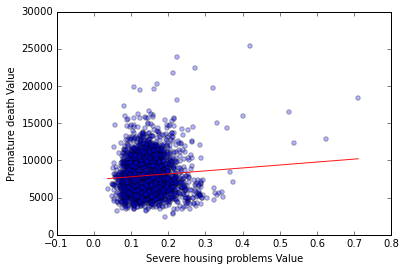

In [207]:
X_prime = np.linspace(pred6.Severe_housing_problems_Value.min(), pred6.Severe_housing_problems_Value.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before
# Now we calculate the predicted values
y_hat = est_6.predict(X_prime)
plt.scatter(pred6.Severe_housing_problems_Value, response, alpha=0.3)  # Plot the raw data
plt.xlabel("Severe housing problems Value")
plt.ylabel("Premature death Value")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red

In [208]:
S_C.append(est_6.params.Severe_housing_problems_Value)

Part 2


In [209]:
response_2 = df.Premature_death_Value
predictors = df[['Diabetes_Value','Median_household_income_Value' , 'Children_eligible_for_free_lunch_Value','HIV_prevalence_rate_Value','Driving_alone_to_work_Value','Severe_housing_problems_Value']]

In [210]:
predictors = sm.add_constant(predictors)
est = sm.OLS(response_2, predictors).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Premature_death_Value   R-squared:                       0.548
Model:                               OLS   Adj. R-squared:                  0.547
Method:                    Least Squares   F-statistic:                     614.0
Date:                   Mon, 28 Sep 2015   Prob (F-statistic):               0.00
Time:                           21:59:15   Log-Likelihood:                -26851.
No. Observations:                   3048   AIC:                         5.372e+04
Df Residuals:                       3041   BIC:                         5.376e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
const                                   6513.4891    482.976     13.486      0.000      5566.497  7460.481
Diabetes_Value                          4.142e+04   1866.256     22.196      0.000      3.78e+04  4.51e+04
Median_household_income_Value             -0.0557      0.003    -15.981      0.000        -0.063    -0.049
Children_eligible_for_free_lunch_Value  3113.9639    274.959     11.325      0.000      2574.840  3653.088
HIV_prevalence_rate_Value                 -0.5170      0.159     -3.258      0.001        -0.828    -0.206
Driving_alone_to_work_Value            -2474.2262    507.076     -4.879      0.000     -3468.473 -1479.979
Severe_housing_problems_Value           1142.8169    752.517      1.519      0.129      -332.676  2618.310
==============================================================================
Omnibus:                      934.591   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5570.163
Skew:                           1.321   Prob(JB):                         0.00
Kurtosis:                       9.073   Cond. No.                     3.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [211]:
est.params

const                                      6513.489111
Diabetes_Value                            41423.061639
Median_household_income_Value                -0.055729
Children_eligible_for_free_lunch_Value     3113.963904
HIV_prevalence_rate_Value                    -0.517030
Driving_alone_to_work_Value               -2474.226181
Severe_housing_problems_Value              1142.816940
dtype: float64

In [212]:
est.params.Diabetes_Value

41423.061638618296

In [213]:
#A list for holding the coefficients for each predictor
M_C =[]
M_C.append(est.params.Diabetes_Value)
M_C.append(est.params.Median_household_income_Value)
M_C.append(est.params.Children_eligible_for_free_lunch_Value)
M_C.append(est.params.HIV_prevalence_rate_Value)
M_C.append(est.params.Driving_alone_to_work_Value)
M_C.append(est.params.Severe_housing_problems_Value)

In [214]:
M_C

[41423.061638618296,
 -0.055729434214291058,
 3113.9639043628868,
 -0.51702954159846726,
 -2474.2261810312339,
 1142.8169404210507]

In [215]:
S_C

[67196.823954711581,
 -0.12956841219977083,
 8979.6539446845891,
 0.9139283389360825,
 4056.857921045329,
 3956.687964094609]

In [216]:
 d = {'S_C' : S_C, 'M_C' : M_C}
    

In [217]:
df_C =DataFrame(d)

In [218]:
df_C

,M_C,S_C
0,41423.061639,67196.823955
1,-0.055729,-0.129568
2,3113.963904,8979.653945
3,-0.517030,0.913928
4,-2474.226181,4056.857921
5,1142.816940,3956.687964


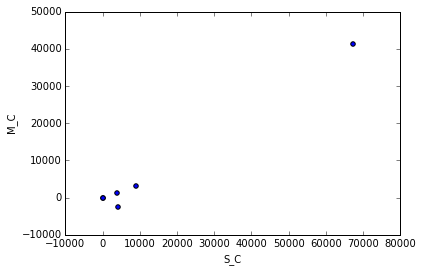

In [227]:
df_C.plot(kind='scatter', x='S_C', y='M_C');


Part 4

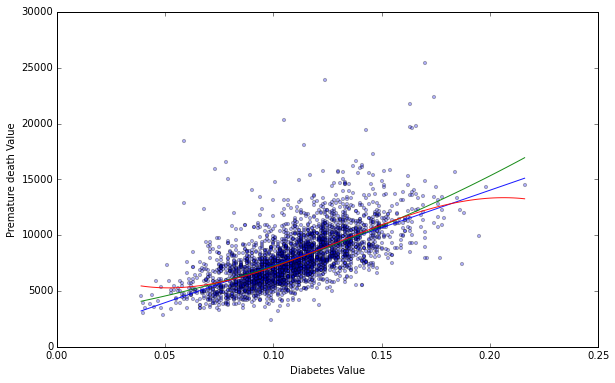

In [222]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.Diabetes_Value, df.Premature_death_Value, s=10, alpha=0.3)
plt.xlabel('Diabetes Value')
plt.ylabel('Premature death Value')

x = pd.DataFrame({'Diabetes_Value': np.linspace(df.Diabetes_Value.min(), df.Diabetes_Value.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='Premature_death_Value ~ 1 + Diabetes_Value', data=df).fit()
plt.plot(x.Diabetes_Value, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='Premature_death_Value ~ 1 + Diabetes_Value + I(Diabetes_Value ** 2.0)', data=df).fit()
plt.plot(x.Diabetes_Value, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Premature_death_Value ~ 1 + Diabetes_Value + I(Diabetes_Value ** 2.0) + I(Diabetes_Value ** 3.0)', data=df).fit()
plt.plot(x.Diabetes_Value, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)
plt.legend()

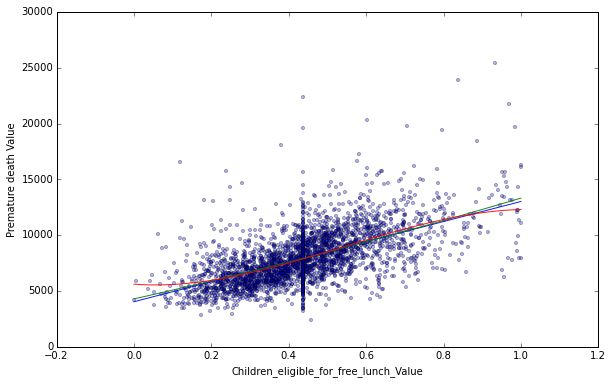

In [223]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.Children_eligible_for_free_lunch_Value, df.Premature_death_Value, s=10, alpha=0.3)
plt.xlabel('Children_eligible_for_free_lunch_Value')
plt.ylabel('Premature death Value')

x = pd.DataFrame({'Children_eligible_for_free_lunch_Value': np.linspace(df.Children_eligible_for_free_lunch_Value.min(), df.Children_eligible_for_free_lunch_Value.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='Premature_death_Value ~ 1 + Children_eligible_for_free_lunch_Value', data=df).fit()
plt.plot(x.Children_eligible_for_free_lunch_Value, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='Premature_death_Value ~ 1 + Children_eligible_for_free_lunch_Value + I(Children_eligible_for_free_lunch_Value ** 2.0)', data=df).fit()
plt.plot(x.Children_eligible_for_free_lunch_Value, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Premature_death_Value ~ 1 + Children_eligible_for_free_lunch_Value + I(Children_eligible_for_free_lunch_Value ** 2.0) + I(Children_eligible_for_free_lunch_Value ** 3.0)', data=df).fit()
plt.plot(x.Children_eligible_for_free_lunch_Value, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)
plt.legend()

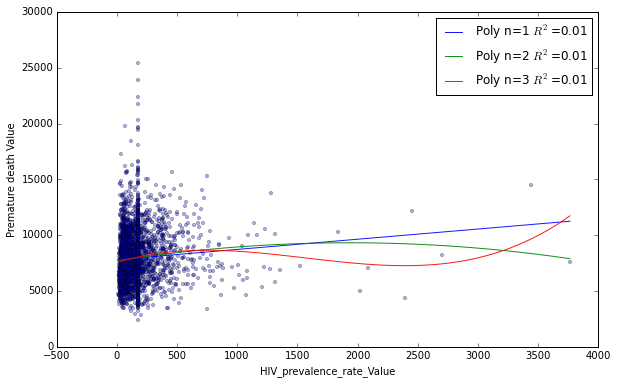

In [225]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.HIV_prevalence_rate_Value, df.Premature_death_Value, s=10, alpha=0.3)
plt.xlabel('HIV_prevalence_rate_Value')
plt.ylabel('Premature death Value')

x = pd.DataFrame({'HIV_prevalence_rate_Value': np.linspace(df.HIV_prevalence_rate_Value.min(), df.HIV_prevalence_rate_Value.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='Premature_death_Value ~ 1 + HIV_prevalence_rate_Value', data=df).fit()
plt.plot(x.HIV_prevalence_rate_Value, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='Premature_death_Value ~ 1 + HIV_prevalence_rate_Value + I(HIV_prevalence_rate_Value ** 2.0)', data=df).fit()
plt.plot(x.HIV_prevalence_rate_Value, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Premature_death_Value ~ 1 + HIV_prevalence_rate_Value + I(HIV_prevalence_rate_Value ** 2.0) + I(HIV_prevalence_rate_Value ** 3.0)', data=df).fit()
plt.plot(x.HIV_prevalence_rate_Value, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)
plt.legend()

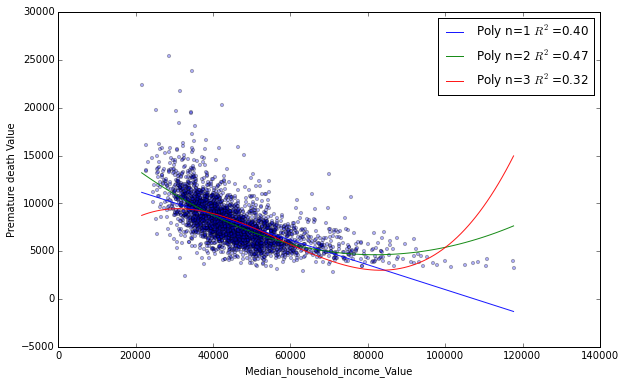

In [229]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.Median_household_income_Value,df.Premature_death_Value, s=10, alpha=0.3)
plt.xlabel('Median_household_income_Value')
plt.ylabel('Premature death Value')

x = pd.DataFrame({'Median_household_income_Value': np.linspace(df.Median_household_income_Value.min(), df.Median_household_income_Value.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='Premature_death_Value ~ 1 + Median_household_income_Value', data=df).fit()
plt.plot(x.Median_household_income_Value, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='Premature_death_Value ~ 1 + Median_household_income_Value + I(Median_household_income_Value ** 2.0)', data=df).fit()
plt.plot(x.Median_household_income_Value, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Premature_death_Value ~ 1 + Median_household_income_Value + I(Median_household_income_Value ** 2.0) + I(Median_household_income_Value ** 3.0)', data=df).fit()
plt.plot(x.Median_household_income_Value, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)
plt.legend()

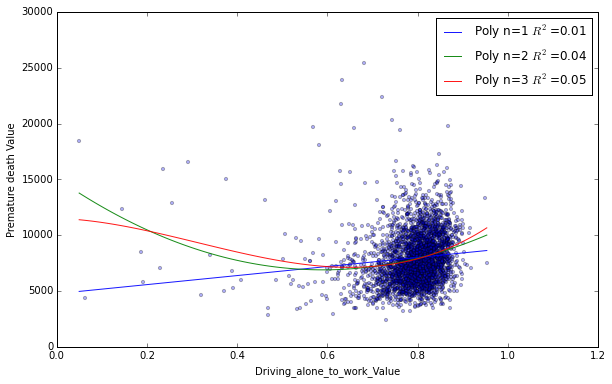

In [230]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.Driving_alone_to_work_Value,df.Premature_death_Value, s=10, alpha=0.3)
plt.xlabel('Driving_alone_to_work_Value')
plt.ylabel('Premature death Value')

x = pd.DataFrame({'Driving_alone_to_work_Value': np.linspace(df.Driving_alone_to_work_Value.min(), df.Driving_alone_to_work_Value.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='Premature_death_Value ~ 1 + Driving_alone_to_work_Value', data=df).fit()
plt.plot(x.Driving_alone_to_work_Value, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='Premature_death_Value ~ 1 + Driving_alone_to_work_Value + I(Driving_alone_to_work_Value ** 2.0)', data=df).fit()
plt.plot(x.Driving_alone_to_work_Value, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Premature_death_Value ~ 1 + Driving_alone_to_work_Value + I(Driving_alone_to_work_Value ** 2.0) + I(Driving_alone_to_work_Value ** 3.0)', data=df).fit()
plt.plot(x.Driving_alone_to_work_Value, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)
plt.legend()

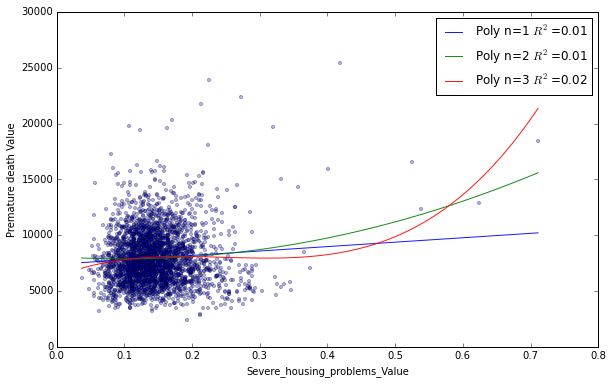

In [231]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.Severe_housing_problems_Value,df.Premature_death_Value, s=10, alpha=0.3)
plt.xlabel('Severe_housing_problems_Value')
plt.ylabel('Premature death Value')

x = pd.DataFrame({'Severe_housing_problems_Value': np.linspace(df.Severe_housing_problems_Value.min(), df.Severe_housing_problems_Value.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='Premature_death_Value ~ 1 + Severe_housing_problems_Value', data=df).fit()
plt.plot(x.Severe_housing_problems_Value, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='Premature_death_Value ~ 1 + Severe_housing_problems_Value + I(Severe_housing_problems_Value ** 2.0)', data=df).fit()
plt.plot(x.Severe_housing_problems_Value, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Premature_death_Value ~ 1 + Severe_housing_problems_Value + I(Severe_housing_problems_Value ** 2.0) + I(Severe_housing_problems_Value ** 3.0)', data=df).fit()
plt.plot(x.Severe_housing_problems_Value, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)
plt.legend()